<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/1_python.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/1_python.ipynb)

</div>

# Unitat 3. Preparació de dades

En aquesta unitat veurem tres punts esencials en la preparació de dades:
- Neteja de dades
- Normalizatció o Transformació
- Anàlisi Estadística Prèvia

## 3.1.  Neteja de Dades
- 3.1.1. Detecció de valors mancants
  - Ús de pandas per detectar valors nuls (isnull(), notnull())
  - Visualització de valors mancants amb seaborn (heatmap)
- 3.1.2. Imputació de dades mancants
  - Omplir amb mitjanes, medians, modals (fillna())
  - Imputació avançada amb SimpleImputer de sklearn
- 3.1.3. Eliminació de dades duplicades
  -  Ús de drop_duplicates()
- 3.1.4. Correcció de dades inconsistents
  - Estandardització de formats (majúscules/minúscules, dates, etc.)
  - Ús de replace() per corregir valors erronis

### 3.1.1. Detecció de valors mancants

Pandas utilitza diferents valors sentinella per representar un valor mancant o desconegut (també conegut com a NA) depenent del tipus de dada: numpy.nan per a tipus de dades NumPy, NaT per a temps de NumPy, NA per a cadenes de text i enters


In [1]:
import pandas as pd
df = pd.read_csv("data/WHO.csv")
df.describe()

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
count,202.000000,202.000000,177.000000,131.000000,178.000000,179.000000,179.000000,1.930000e+02,193.000000,193.000000,...,1.860000e+02,1.780000e+02,128.000000,1.710000e+02,181.000000,170.000000,181.000000,1.880000e+02,188.000000,188.000000
mean,101.500000,3.579208,59.457627,78.871756,11250.112360,84.033520,85.698324,3.409805e+04,1.297927,54.911917,...,1.483596e+05,2.015567e+11,57.253516,3.424012e+08,56.677624,54.356471,56.677624,1.665763e+07,2.165851,55.195213
std,58.456537,1.808263,49.105286,20.415760,12586.753417,17.788047,15.451212,1.304957e+05,1.163864,23.554182,...,6.133091e+05,9.400689e+11,138.669298,5.943043e+10,60.060929,61.160556,60.060929,5.094867e+07,1.596628,23.742122
min,1.000000,1.000000,0.000000,23.600000,260.000000,6.000000,11.000000,2.000000e+00,-2.500000,10.000000,...,2.565000e+01,5.190000e+07,0.990000,-7.140000e+11,2.900000,3.000000,2.900000,1.545600e+04,-1.160000,10.000000
25%,51.250000,2.000000,19.000000,68.400000,2112.500000,79.000000,79.500000,1.340000e+03,0.500000,36.000000,...,1.672615e+03,3.317500e+09,16.292500,-1.210000e+09,12.400000,8.475000,12.400000,9.171623e+05,1.105000,35.650000
50%,101.500000,3.000000,46.000000,86.500000,6175.000000,90.000000,90.000000,6.762000e+03,1.300000,57.000000,...,1.021157e+04,1.145000e+10,28.515000,-2.240000e+08,29.980000,27.600000,29.980000,3.427661e+06,1.945000,57.300000
75%,151.750000,5.000000,91.000000,95.300000,14502.500000,96.000000,96.000000,2.173200e+04,2.100000,73.000000,...,6.549217e+04,8.680000e+10,55.310000,1.024000e+09,88.700000,82.900000,88.700000,9.837113e+06,3.252500,72.750000
max,202.000000,7.000000,199.000000,99.800000,60870.000000,100.000000,100.000000,1.328474e+06,4.300000,100.000000,...,5.776432e+06,1.100000e+13,1334.860000,1.390000e+11,267.000000,253.700000,267.000000,5.270000e+08,7.850000,100.000000


In [2]:
df.count()

Country                           202
CountryID                         202
Continent                         202
Adolescent fertility rate (%)     177
Adult literacy rate (%)           131
                                 ... 
Under_five_mortality_from_IHME    170
Under_five_mortality_rate         181
Urban_population                  188
Urban_population_growth           188
Urban_population_pct_of_total     188
Length: 358, dtype: int64

Si observem la fila de valors de `count`, veiem que no totes les columnes tenen el mateix número. Hi ha valors desconeguts o perduts.

In [5]:
df.loc[:,"Adult literacy rate (%)"]

0      28.0
1      98.7
2      69.9
3       NaN
4      67.4
       ... 
197    90.3
198     NaN
199    54.1
200    68.0
201    89.5
Name: Adult literacy rate (%), Length: 202, dtype: float64

In [6]:
# Podem veure quants valors son NA
df.loc[:,"Adult literacy rate (%)"].isna()

0      False
1      False
2      False
3       True
4      False
       ...  
197    False
198     True
199    False
200    False
201    False
Name: Adult literacy rate (%), Length: 202, dtype: bool

In [7]:
df.loc[:,"Adult literacy rate (%)"].isnull() #és un alias de isna

0      False
1      False
2      False
3       True
4      False
       ...  
197    False
198     True
199    False
200    False
201    False
Name: Adult literacy rate (%), Length: 202, dtype: bool

In [9]:
df.loc[:,"Adult literacy rate (%)"].notnull() #la negació

0       True
1       True
2       True
3      False
4       True
       ...  
197     True
198    False
199     True
200     True
201     True
Name: Adult literacy rate (%), Length: 202, dtype: bool

In [29]:
df.count()/df.shape[0] # el %  de valors coneguts en les columnes

Country                           1.000000
CountryID                         1.000000
Continent                         1.000000
Adolescent fertility rate (%)     0.876238
Adult literacy rate (%)           0.648515
                                    ...   
Under_five_mortality_from_IHME    0.841584
Under_five_mortality_rate         0.896040
Urban_population                  0.930693
Urban_population_growth           0.930693
Urban_population_pct_of_total     0.930693
Length: 358, dtype: float64

Podem visualitzar els valors NA

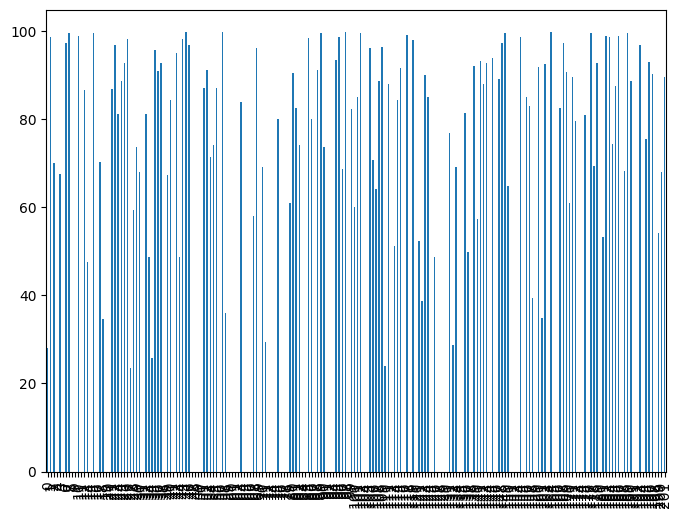

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df["Adult literacy rate (%)"].plot(kind="bar") #No hi ha un cojunt 
plt.show()



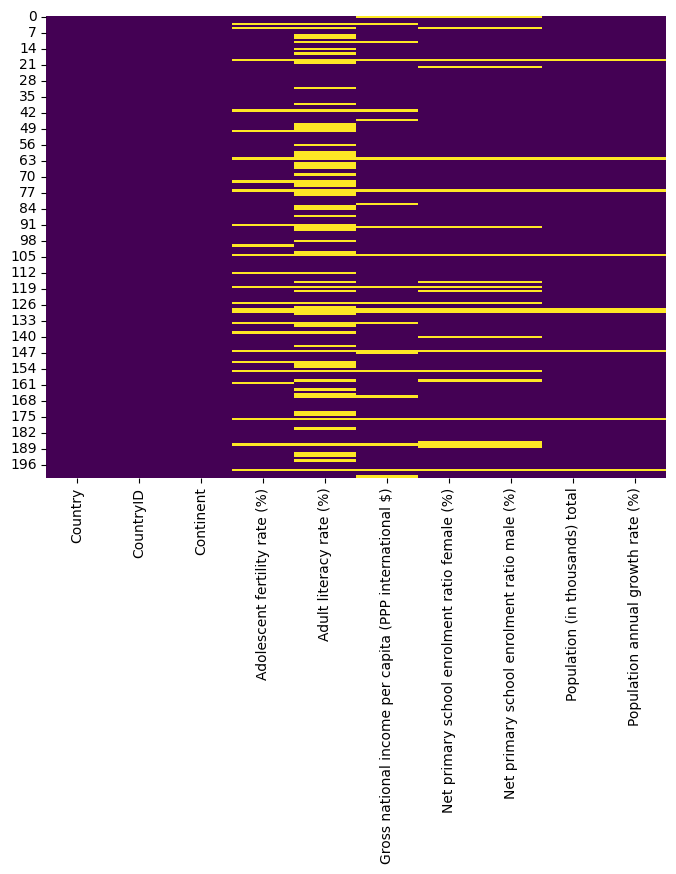

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:,:10].isnull(), cbar=False, cmap='viridis') #en groc els valors desconeguts
plt.show()

In [46]:
import numpy as np #En un arrray de numyy un valor NA impossibilita certes operacions.
a = np.array([1.0, 2.0, np.nan, 4.0])
print(a.mean())
print("-"*10)
print(a.sum())
print("-"*10)

data = {'a': a}
df = pd.DataFrame(data) #en Pandas No
print(df.mean())
print("-"*10)
print(df.a.mean())

nan
----------
nan
----------
a    2.333333
dtype: float64
----------
2.3333333333333335


In [61]:
print(a)
print(a.cumsum()) #També afecta a altres operaciones aritmètiques


[ 1.  2. nan  4.]
[ 1.  3. nan nan]


### Activitat

In [30]:
# Cuants valors desconeguts té el país: Italy?

In [ ]:
# Quin és el país amb més valors desconeguts?


In [47]:
# Quina es la mitja de valors desconeguts considerant tot el dataframe?

### 3.1.2. Imputació de dades mancants
Omplir amb mitjanes, medians, modals (fillna())

Per a certs càlculs o visualitzacions ens interessa omplir els espais deixats pels NA.

In [55]:
data = {'a': list(range(5))}
df = pd.DataFrame(data)
df

,a
0,0
1,1
2,2
3,3
4,4


In [59]:
df.loc[1:2,"a"]=None #Insercció de NA
df.loc[1:2,"a"]=np.nan #semblant. Pandas detecta el tipus de la sèrie
df

,a
0,0.0
1,NaN
2,NaN
3,3.0
4,4.0


In [57]:
df.mean()

a    2.333333
dtype: float64

Podem omplir amb valors

In [62]:
df.fillna(0)

,a
0,0.0
1,0.0
2,0.0
3,3.0
4,4.0


In [68]:
df.fillna(df.mean())

,a
0,-1.0
1,2.0
2,2.0
3,3.0
4,4.0


In [65]:
df.loc[0,"a"]=-1
df.ffill()  #Agafant el primer valor

,a
0,-1.0
1,-1.0
2,-1.0
3,3.0
4,4.0


In [66]:
df.bfill() #Agafant l'anterior valor

,a
0,-1.0
1,3.0
2,3.0
3,3.0
4,4.0


In [69]:
df.interpolate() # o per interpolació, i amb diferents paràmetres
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate


,a
0,-1.000000
1,0.333333
2,1.666667
3,3.000000
4,4.000000


### Activitat

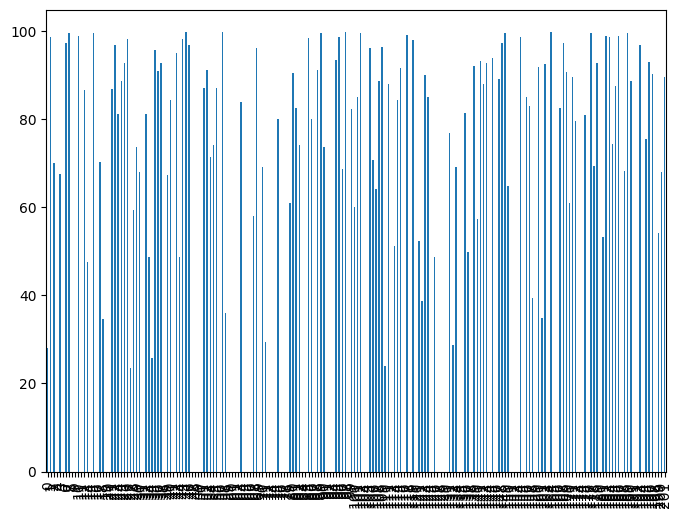

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/WHO.csv")

plt.figure(figsize=(8, 6))
df["Adult literacy rate (%)"].plot(kind="bar") #No hi ha un cojunt 
plt.show()

# Visualitza la columna 'adult literacy rate (%)' on els seus NA siguin el percentil 25% de la seva sèrie.

El mètode `SimpleImputer`de la llibrería Sklearn, també permet altres subtitucions de NAs.
Referència: https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html

In [75]:
from sklearn.impute import SimpleImputer

data = {'a': [1,2,None,4, 4]}
df = pd.DataFrame(data)
print(df)

     a
0  1.0
1  2.0
2  NaN
3  4.0
4  4.0


In [77]:
imputer = SimpleImputer(strategy='mean') # 'mean' , 'median', 'most_frequent', o 'constant'
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,a
0,1.00
1,2.00
2,2.75
3,4.00
4,4.00


In [78]:
imputer = SimpleImputer(strategy='most_frequent') # 'mean' , 'median', 'most_frequent', o 'constant'
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

,a
0,1.0
1,2.0
2,4.0
3,4.0
4,4.0


### 3.1.3. Eliminació de dades duplicades

Les mostres d'un estudi poden estar duplicades. Hi ha mètodes a Pandas per trobar o eliminar aquestes mostres.

In [81]:
import pandas as pd
df = pd.read_csv("data/WHO.csv")
df.head(3)

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3


In [82]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

In [83]:
df.duplicated().sum() # cap valor duplicat

0

In [87]:
df = pd.read_csv("data/data_groups.csv")
df.drop(columns=[df.columns[0],df.columns[1],df.columns[2]],inplace=True)
df

,CP,Ciutat,Genere,Tipus certificat cat,Punts
0,7800,Eivissa,M,B,73
1,7511,Ruberts,F,A,40
2,7340,Alaro,M,A,45
3,7609,Bellavista,F,B,40
4,7006,Palma,M,B,86
...,...,...,...,...,...
995,7529,Ariany,F,B,32
996,7701,Mao,M,B,72
997,7800,Eivissa,F,B,14
998,7009,Palma,M,A,1


In [89]:
df.duplicated().sum() #En aquest cas hi ha 81 

81

In [94]:
import numpy as np
np.unique(df.Ciutat,return_counts=True) #Aquesta funció de numpy retorna els elements únics i, també, la seva freqüència.
#Naturalment aquesta sèrie té valors repetits! 

(array(['Alaro', 'Ariany', 'Bellavista', 'Binissalem', 'Eivissa',
        'La Savina', 'Mao', 'Palma', 'Pedruscada', 'Ruberts'], dtype=object),
 array([120, 113,  98,  93,  91,  90, 108,  96, 106,  85]))

In [96]:
df.Ciutat.duplicated().sum()

990

Segons el tipus d'estudi hem d'eliminar els 'duplicates', ja que podem representar anomalies d'un dispositiu, d'inclusió de dades (un duplicat d'una mateixa persona), etc.

In [98]:
print(df.shape) #amb duplicats

df_sense = df.drop_duplicates()

print(df_sense.shape) #sense


(919, 5)
(1000, 5)


### Activitat

Crea una llista de 100 nombres aleatoris entre 1 i 200, hi ha qualque `duplicate`?

In [102]:
import numpy as np
np.random.seed(2024) #per repetir la mateixa seqüència aleatoria
np.random.randint(0,2,10) #Tip d'ajuda

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

### 3.1.4. Correcció de dades inconsistents

La consistència numèrica depèn del tipus de variable i els seus valors, per exemple, és inconsistent trobar-se valors negatius de velocitat de vent. Podem eliminar aquestes mostres o reemplaçar aquests valors. 

I, per una altra banda, podem tractar també el seu format com la transformació d'elements puntuals de sèries textuals i temporals.

In [123]:
import pandas as  pd
# Un fitxer amb informació real meteorològica
df = pd.read_csv("data/rdu-weather-history.csv",sep=";")

print(df.columns)

print(df.shape)

(df["avgwindspeed"]<0).sum() # No hi ha valors negatius de la mitja de la velocitat del vent!

Index(['date', 'temperaturemin', 'temperaturemax', 'precipitation', 'snowfall',
       'snowdepth', 'avgwindspeed', 'fastest2minwinddir',
       'fastest2minwindspeed', 'fastest5secwinddir', 'fastest5secwindspeed',
       'fog', 'fogheavy', 'mist', 'rain', 'fogground', 'ice', 'glaze',
       'drizzle', 'snow', 'freezingrain', 'smokehaze', 'thunder', 'highwind',
       'hail', 'blowingsnow', 'dust', 'freezingfog'],
      dtype='object')
(4557, 28)


0

La millor manera de comprovar la consistència de valors numérics es analitzan la seva distribució en relació a la seva natura. És pràctic fer un `boxplot`. Referència: https://en.wikipedia.org/wiki/Box_plot

<Axes: >

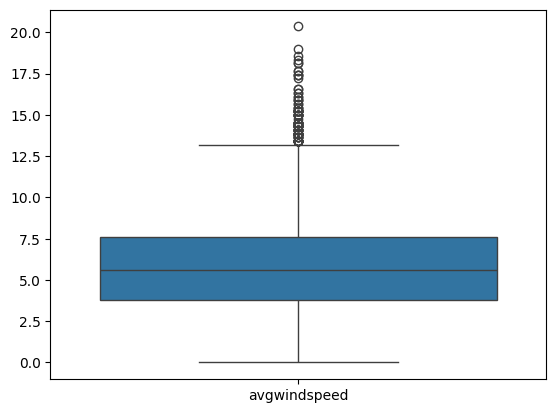

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(data=df[["avgwindspeed"]]) # https://seaborn.pydata.org/generated/seaborn.boxplot.html

### Activitat

Cuant hi ha valors de `snow`, hi ha `snowfall`?

In [126]:
#TODO
df[["snow","snowfall"]] #?

,snow,snowfall
0,No,0.0
1,No,0.0
2,No,0.0
3,No,0.0
4,No,0.0
...,...,...
4552,No,0.0
4553,No,0.0
4554,No,0.0
4555,No,0.0


Els valors textuals poden reemplaçar-se amb altres valors o mitjançant expressions regulars.

In [127]:
import pandas as pd
df = pd.read_csv("data/WHO.csv")
df.head(3)

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3


In [132]:
df["Country"]=df.Country.str.lower()
df["Country"]

0             afghanistan
1                 albania
2                 algeria
3                 andorra
4                  angola
              ...        
197               vietnam
198    west bank and gaza
199                 yemen
200                zambia
201              zimbabwe
Name: Country, Length: 202, dtype: object

In [142]:
df["Country"].replace(r"\ban\w*","ANDIS", regex=True) #Les expressions regulars determinen la composicó sintàctica de un conjunt de caracters.

0               afghanistan
1                   albania
2                   algeria
3                     ANDIS
4                     ANDIS
               ...         
197                 vietnam
198    west bank ANDIS gaza
199                   yemen
200                  zambia
201                zimbabwe
Name: Country, Length: 202, dtype: object

In [154]:
#Funció map i diccionari (que fà?)
data = {'a': [1,2,3,None,3,9]} #que efecte té el None?, i el 9?
df = pd.DataFrame(data)
print(df)
print(df["a"].map({1:"uno",2:"dos",3:"tres"})) 

     a
0  1.0
1  2.0
2  3.0
3  NaN
4  3.0
5  9.0
0     uno
1     dos
2    tres
3     NaN
4    tres
5     NaN
Name: a, dtype: object


### Activitat

In [156]:
# Reemplaça el id del continent pel seu nom (pots inventar o averiguar el nom del continent per la teva compte)

import pandas as pd
df = pd.read_csv("data/WHO.csv")
df.Continent

0      1
1      2
2      3
3      2
4      3
      ..
197    6
198    1
199    1
200    3
201    3
Name: Continent, Length: 202, dtype: int64

Els operadors lògics també fan aquesta funció d'identificar patrons i després poder fer canvis pertinents. En aquest punt podem emprar les funcions `lambda`

Una funció lambda és una funció efímera que no cal declarar-la com una funció. La seva sintaxis és:

```
lambda x: y
```
On `x` es un argument d'entrada i `y`es la sortida+


Aquesta funció s'aplica (`apply`) en els elements de un df o una sèrie

In [158]:
data = {
    'estudiant': ['Juan', 'Ana', 'Luis', 'Maria', 'Pedro'],
    'nota': [55, 82, 45, 67, 90]
}

df = pd.DataFrame(data)
print(df)



  estudiant  nota
0      Juan    55
1       Ana    82
2      Luis    45
3     Maria    67
4     Pedro    90


In [159]:
df['estat'] = df['nota'].apply(lambda x: 'Suspes' if x < 60 else 'Aprovat')
print(df)

  estudiant  nota    estat
0      Juan    55   Suspes
1       Ana    82  Aprovat
2      Luis    45   Suspes
3     Maria    67  Aprovat
4     Pedro    90  Aprovat


### Activitat

Fes una classificació MANUAL de les reserves (`Total_reserves`) d'un país en una nova columna (`cat_reserves`)<br/>
On:
- NaN -> "Desconegut"
- <50 -> "Small"
- 50>= x < 100 -> "Medium"
- x > 100 -> "Large"

Pots fer també una representació de la quantitat de països en cada classificació (ajuda: `groupby`)

In [160]:
import pandas as pd
df = pd.read_csv("data/WHO.csv")
df["Total_reserves"].head(10)

0       NaN
1     78.14
2    351.36
3       NaN
4     27.13
5       NaN
6     21.11
7     35.98
8       NaN
9       NaN
Name: Total_reserves, dtype: float64

- Referencies:
  - https://pandas.pydata.org/docs/user_guide/missing_data.html
  - https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html

## 3.2 Normalització o Transformació de Dades
- 3.2.1. Escalat de dades numèriques
  - Normalització i estandardització
- 3.2.2. Codificació de variables categòriques
  - One-Hot Encoding amb pandas (get_dummies())
  - Label Encoding amb sklearn
- 3.2.3. Transformació de característiques
  - Aplicar logaritmes, polinomis o transformacions personalitzades
  - Ús de FunctionTransformer de sklearn


### 3.2.1. Escalat de dades numèriques
  - Normalització i estandardització

No podem comparar escales de nombres de diferents tipologies, com per exemple, salari i edat. Necessitem **normalizar**.


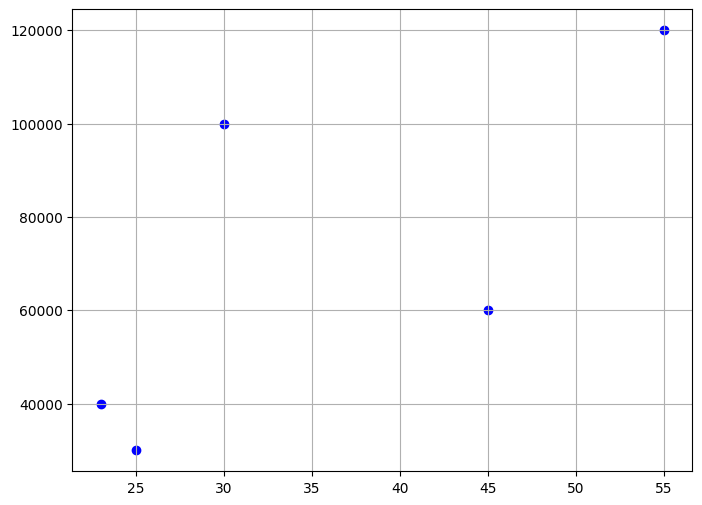

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'edat': [25, 45, 55, 23, 30],
    'ingressos': [30000, 60000, 120000, 40000, 100000],
}

df = pd.DataFrame(data)


plt.figure(figsize=(8, 6))
plt.scatter(df.edat, df.ingressos, color='blue', marker='o')
plt.grid(True)
plt.show()


Hi ha dos tipus de normalització:
- Per rang (generalment un valor màxim i mínim)
- Per z-score (cero la mitja i a 1 la desviació)

In [165]:
# Per rang
min, max = df.edat.min(),df.edat.max()
print(min,max)
df["edat_norm"] = (df.edat-min)/(max-min)
print(df)

23 55
   edat  ingressos  edat_norm
0    25      30000    0.06250
1    45      60000    0.68750
2    55     120000    1.00000
3    23      40000    0.00000
4    30     100000    0.21875


In [166]:
min, max = df.ingressos.min(),df.ingressos.max()
print(min,max)
df["ingressos_norm"] = (df.ingressos-min)/(max-min)
print(df)

30000 120000
   edat  ingressos  edat_norm  ingressos_norm
0    25      30000    0.06250        0.000000
1    45      60000    0.68750        0.333333
2    55     120000    1.00000        1.000000
3    23      40000    0.00000        0.111111
4    30     100000    0.21875        0.777778


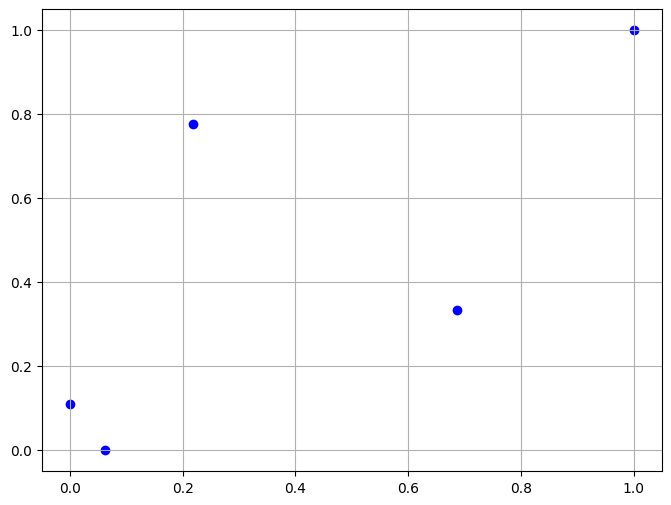

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(df.edat_norm, df.ingressos_norm, color='blue', marker='o')
plt.grid(True)
plt.show() #la distribució és mante, però no les unitats.

In [171]:
# per z-score
data = {
    'edat': [25, 45, 55, 23, 30],
    'ingressos': [30000, 60000, 120000, 40000, 100000],
}

df = pd.DataFrame(data)

df_norm = (df-df.mean())/df.std()
print(df_norm)

       edat  ingressos
0 -0.765388  -1.032796
1  0.678740  -0.258199
2  1.400804   1.290994
3 -0.909801  -0.774597
4 -0.404356   0.774597


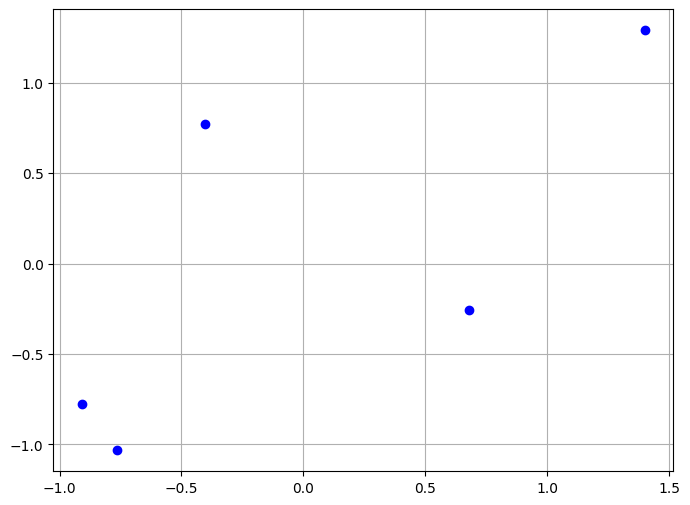

In [173]:
plt.figure(figsize=(8, 6))
plt.scatter(df_norm.edat, df_norm.ingressos, color='blue', marker='o')
plt.grid(True)
plt.show() #mateixa distribució!

### Activitat

En aquest exemple, cada jugador de futbol fa diferents passades en dos partits. Per exemple, per comparar la mitjana de cada partit convindria normalitzar les dues sèries, ja que cada partit té una naturalesa diferent (local vs. visitant, diferent context, etc.).

In [179]:
import pandas as pd
import numpy as np

jugadors = ['Jugador1', 'Jugador2', 'Jugador3', 'Jugador4', 'Jugador5', 
             'Jugador6', 'Jugador7', 'Jugador8', 'Jugador9', 'Jugador10']

np.random.seed(42)
partit1 = np.random.randint(40, 120, size=10)
partit2 = np.random.randint(15, 40, size=10)

df_passades = pd.DataFrame({
    'Jugador': jugadors,
    'Pases_Partido1': partit1,
    'Pases_Partido2': partit2
})

df_passades


,Jugador,Pases_Partido1,Pases_Partido2
0,Jugador1,91,35
1,Jugador2,54,16
2,Jugador3,111,38
3,Jugador4,100,26
4,Jugador5,60,20
5,Jugador6,114,16
6,Jugador7,114,35
7,Jugador8,63,15
8,Jugador9,42,26
9,Jugador10,61,36


In [180]:
# Normalitza per rang cada partit


In [181]:
# Quin jugador té un comportament pitjor en el nombre global de passades.
# en aquest cas: pijtor equival a major desviació 

### 3.2.2. Codificació de variables categòriques
  - One-Hot Encoding amb pandas (get_dummies())
  - Label Encoding amb sklearn

La codificació permet transformar series d'objectes a sèries numerals per fer operacions.

In [182]:
data = {'ciutats': ['Barcelona', 'Madrid', 'Sevilla', 'Barcelona', 'Madrid']}
df = pd.DataFrame(data)

In [183]:
"Madrid"-"Sevilla" #no té sentit aquesta operació?

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [190]:
# 1º manera: a cada item li dona un Identificador
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder() #inicializatció

encoder.fit_transform(df[['ciutats']])


array([[0.],
       [1.],
       [2.],
       [0.],
       [1.]])

In [191]:
categorical_encoded = encoder.fit_transform(df[['ciutats']])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(['ciutats']))

print(categorical_encoded_df)

   ciutats
0      0.0
1      1.0
2      2.0
3      0.0
4      1.0


In [187]:
# 2º manera: a cada mostra conservant el tipus crean noves columnes
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) #inicializatció

encoder.fit_transform(df[['ciutats']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [188]:
categorical_encoded = encoder.fit_transform(df[['ciutats']])

categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(['ciutats']))

print(categorical_encoded_df)

   ciutats_Barcelona  ciutats_Madrid  ciutats_Sevilla
0                1.0             0.0              0.0
1                0.0             1.0              0.0
2                0.0             0.0              1.0
3                1.0             0.0              0.0
4                0.0             1.0              0.0


Els `labelencoders` podem utilizar-los per normalitzar etiquetes

In [192]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["sineu", "sineu", "palma", "andratx","palma"])

LabelEncoder()

In [194]:
le.transform(["palma", "palma", "andratx"]) # de texto a id

array([1, 1, 0])

In [196]:
le.inverse_transform([2, 2, 1]) #de id a texto

array(['sineu', 'sineu', 'palma'], dtype='<U7')

### Activitat

In [207]:
# Amb la següent informació:
import pandas as pd
import numpy as np

np.random.seed(2024)
passades_jugadors = ["jugador%i"%np.random.randint(1,50) for i in range(10000)]
passades_jugadors[:10]


['jugador9',
 'jugador33',
 'jugador1',
 'jugador28',
 'jugador37',
 'jugador42',
 'jugador2',
 'jugador36',
 'jugador11',
 'jugador3']

In [208]:
## genera un labelencoder de cada jugador


In [1]:
## quin jugador surt més?

### 3.2.3. Transformació de característiques
  - Aplicar logaritmes, polinomis o transformacions personalitzades
  - Ús de FunctionTransformer de sklearn

Les transformacions de característiques són molt útils en machine learning per millorar el rendiment dels models, especialment quan les relacions entre les variables no són lineals o quan les dades tenen distribucions esbiaixades. A continuació t’explico breument les transformacions més comunes i et dono exemples de com aplicar-les utilitzant pandas o scikit-learn.

Son semblats a fer una normalització, però l'escala en molt de casos ja no és lineal

**Transformació logarítmica**<br/>
Serveix per reduir l'asimetria d'una variable (quan una variable té una distribució molt esbiaixada cap a la dreta). És útil quan les dades varien en ordres de magnitud molt diferents.

In [12]:
import numpy as np

ventes = [10, 12, 34, 21, 20, 100, 1000, 10000, 100000, 38038080]

log_ventes = np.log(ventes)
print(log_ventes)

[ 2.30258509  2.48490665  3.52636052  3.04452244  2.99573227  4.60517019
  6.90775528  9.21034037 11.51292546 17.45409832]


**Transformacions Polinòmiques**<br/>
S'utilitzen per afegir relacions no lineals entre les variables. Genera noves característiques com el quadrat o el cub d'una variable, cosa que pot ajudar els models a captar relacions més complexes.


In [13]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([[2], [3], [4]])

# Crear el objeto PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(X_poly)

[[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


**Transformacions Personalitzades**<br/>
Pots definir les teves pròpies funcions de transformació, especialment quan coneixes la naturalesa específica del teu problema. Per exemple, transformar una variable amb una arrel cúbica o una funció matemàtica personalitzada.

In [14]:
raiz = np.cbrt(ventes) #raiz cubica

def inversa(x): #una funció propia
    return 1/X

ventes_inv = np.apply_along_axis(inversa,0,ventes) #https://numpy.org/doc/2.0/reference/generated/numpy.apply_along_axis.html
# en pandas és apply

print(ventes)
print(log_ventes)
print(X_poly)
print(raiz)
print(ventes_inv)


[10, 12, 34, 21, 20, 100, 1000, 10000, 100000, 38038080]
[ 2.30258509  2.48490665  3.52636052  3.04452244  2.99573227  4.60517019
  6.90775528  9.21034037 11.51292546 17.45409832]
[[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]
[  2.15443469   2.28942849   3.2396118    2.75892418   2.71441762
   4.64158883  10.          21.5443469   46.41588834 336.30980496]
[[0.5       ]
 [0.33333333]
 [0.25      ]]


La funció `FunctionTransformer` fa aquesta funció "d'apply"

In [15]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

data = {'valors': [8, 27, 64, 125, 216]}
df = pd.DataFrame(data)

def arrel_cubica(x):
    return np.cbrt(x)

transformador = FunctionTransformer(arrel_cubica, validate=True)

df['arrel_cubica_valors'] = transformador.transform(df[['valors']])

print(df)

   valors  arrel_cubica_valors
0       8                  2.0
1      27                  3.0
2      64                  4.0
3     125                  5.0
4     216                  6.0


/Users/isaac/.pyenv/versions/3.11.0rc2/envs/my3110/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


### Activitat

In [17]:
import pandas as pd
import numpy as np

np.random.seed(2024)
data = {
    'id_comprador': np.arange(1, 11),  # ID dels compradors
    'data_compra': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # Dates de compra
    'vendes_cotxes': np.random.randint(1, 15, size=10) * 10,  # Vendes de cotxes 
    'vendes_cargols': np.random.randint(50, 100, size=10) * 10000,  # Vendes de cargols 
    'vendes_cases': np.random.randint(1, 6, size=10),  # Vendes de cases 
}

df = pd.DataFrame(data)

print(df)


   id_comprador data_compra  vendes_cotxes  vendes_cargols  vendes_cases
0             1  2023-01-01             90          850000             4
1             2  2023-01-02            110          600000             5
2             3  2023-01-03             10          520000             4
3             4  2023-01-04             10          820000             3
4             5  2023-01-05            120          870000             2
5             6  2023-01-06             50          990000             3
6             7  2023-01-07             80          800000             5
7             8  2023-01-08            100          970000             3
8             9  2023-01-09             20          600000             2
9            10  2023-01-10            130          960000             4


In [ ]:
# normalitza per logaritmo la sèrie de cargols

In [18]:
# normalitza per rang la sèrie de cotxes

## 3. Anàlisi Estadística Prèvia
- 3.1. Mesures de tendència central i dispersió
  - Càlcul de la mitjana, mediana, moda, variància i desviació estàndard amb pandas
- 3.2. Anàlisi de distribucions
  - Visualització de distribucions amb histogrames (matplotlib, seaborn)
  - Anàlisi de simetria i curtosi
- 3.3. Detecció de valors atípics (outliers)
  - Ús de boxplots i z-scores
  - Detecció de valors atípics amb l'IQR (ranc interquartílic)

### 3.1. Mesures de tendència central i dispersió
  - Càlcul de la mitjana, mediana, moda, variància i desviació estàndard amb pandas

In [ ]:
# Com reecordatori de temaria anterior...
import pandas as pd
import numpy as np

np.random.seed(2024)
data = {
    'id_comprador': np.arange(1, 11),  # ID dels compradors
    'data_compra': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # Dates de compra
    'vendes_cotxes': np.random.randint(1, 15, size=10) * 10,  # Vendes de cotxes 
    'vendes_cargols': np.random.randint(50, 100, size=10) * 10000,  # Vendes de cargols 
    'vendes_cases': np.random.randint(1, 6, size=10),  # Vendes de cases 
}

df = pd.DataFrame(data)

print(df)

In [22]:
#damun d'una sèrie podem aplicar aquestes distribucions estadistiques
print(df.vendes_cotxes.mean()) #mean
print(df.vendes_cotxes.std()) #desviació
print(df.vendes_cargols.quantile(0.9)) #percentile 90%

72.0
46.139883927995406
972000.0


In [23]:
df.loc[:,["vendes_cotxes","vendes_cotxes","vendes_cases"]].mean()

vendes_cotxes    72.0
vendes_cotxes    72.0
vendes_cases      3.5
dtype: float64

### 3.2. Anàlisi de distribucions
  - Visualització de distribucions amb histogrames (matplotlib, seaborn)
  - Anàlisi de simetria i curtosi

És important identificar aquelles sèries o característiques que no tenen una representativitat mínima o que estan descompensades respecte a la resta, ja que això pot provocar sobreajustaments inadequats en els models d'aprenentatge automàtic. Per exemple, en les transaccions comercials, hi ha un gran nombre que són correctes, però una petita part són fraus. La preparació d'un catàleg de dades amb molt poques mostres de frau no permetrà que el model d'aprenentatge les detecti.

L'aplicació d'un model d'aprenentatge ha d'anar acompanyada d'un estudi de la distribució de les variables.

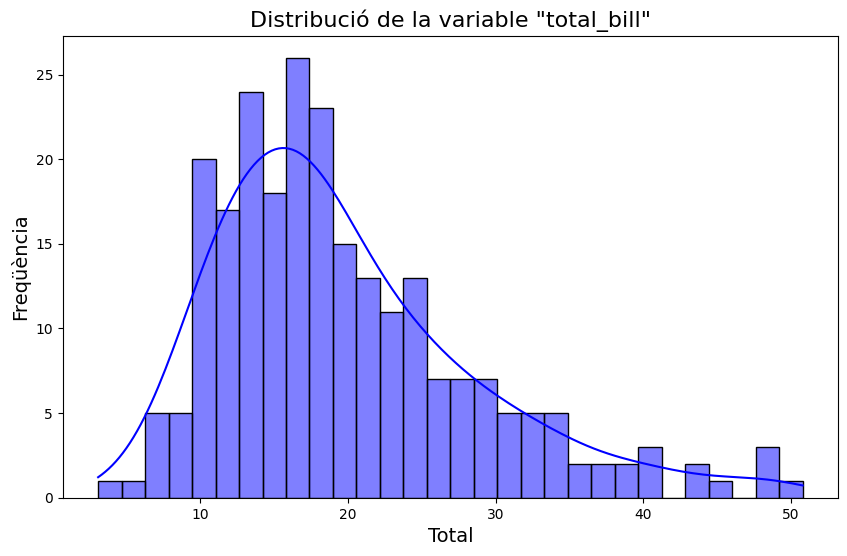

In [2]:
# Els histogrames son molt efficients per interpretat aquesta distribució

import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips") # Hi ha llibreríes que tenem datasets d'us didactic

plt.figure(figsize=(10, 6))

## HISTOGRAMA amb seabon
sns.histplot(tips['total_bill'], kde=True, bins=30, color="blue")

plt.title('Distribució de la variable "total_bill"', fontsize=16)
plt.xlabel('Total', fontsize=14)
plt.ylabel('Freqüència', fontsize=14)

plt.show()

Si, per exemple, volguéssim detectar o classificar propines que estiguin entre 40 i 50, aquesta fracció de mostres hauria d'estar compensada amb la resta en el nou conjunt de dades.

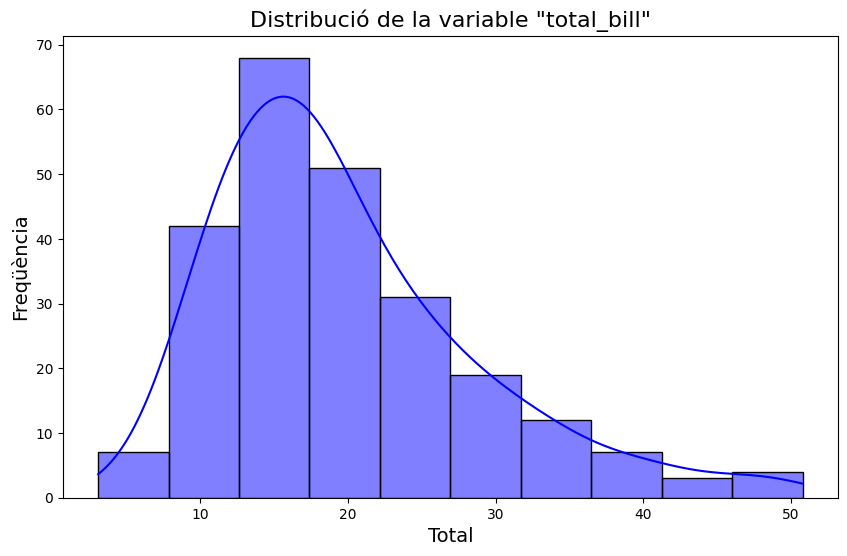

In [4]:
# El nombre de columnes (bin) ajuda a entendre el nivell de resolució
plt.figure(figsize=(10, 6))

sns.histplot(tips['total_bill'], kde=True, bins=10, color="blue")

plt.title('Distribució de la variable "total_bill"', fontsize=16)
plt.xlabel('Total', fontsize=14)
plt.ylabel('Freqüència', fontsize=14)

plt.show()

**Coeficient d'asimetria**<br/>
Mesura el grau d'asimetria de la distribució respecte a la mitjana. Un valor positiu d'aquest indicador significa que la distribució està esbiaixada cap a l'esquerra (orientació positiva). Un resultat negatiu significa que la distribució s'esbiaixa cap a la dreta

**Curtosi**, apuntament o biaix (kurtosis): representa com d'afilat està el cim del gràfic, en comparació amb una distribució normal (a major curtosi, més afilat), és a dir, el grau de concentració que presenten els valors d'una variable al voltant d'una zona central. La curtosi és positiva si està per sobre de la distribució normal, i negativa si està per sota.

Referències: 
- https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica
- https://es.wikipedia.org/wiki/Curtosis

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
import numpy as np
import scipy.stats as sp  

# 1st Moment: Mitjana  
print("Mitjana: ",np.mean(tips.total_bill))
# 2nd Moment: Variància  
print("Variància: ",np.var(tips.total_bill))  
# 3rd Moment: Asimetria 
print("Asimetria: ",sp.skew(tips.total_bill)) #
# 4th Moment: Curtosis  
print("Curtosis: ",sp.kurtosis(tips.total_bill))

Mitjana:  19.78594262295082
Variància:  78.92813148851114
Asimetria:  1.1262346334818638
Curtosis:  1.1691681323851366


- Asimetria positiva 1.12>0, distribució cap a la detra!
- Curtosi (no superior a 3 i positiva): distribució amb "cues" menys llargues que una distribució normal (hi ha valors atípics però sense moltes cues).

Una curtosi elevada indica:

Pic agut al centre de la distribució.
 - Més valors concentrats al voltant de la mitjana que la distribució normal.
 - Cues més pesades a causa d'una major concentració de valors extrems o atípics a les cues.
 - Major probabilitat d'esdeveniments extrems.
 
D'altra banda, una curtosi baixa indica:
- Pic pla.
- Menys valors concentrats al voltant de la mitjana, però encara més que la distribució normal.
- Cues més lleugeres.
- Menor probabilitat d'esdeveniments extrems.


Segons el grau, les distribucions tenen tres tipus de curtosi:
- Distribució mesocúrtica (curtosi = 3, excés de curtosi = 0): distribució normal perfecta o molt propera a ella.
- Distribució leptocúrtica (curtosi > 3, excés de curtosi > 0): pic agut, cues pesades.
- Distribució platicúrtica (curtosi < 3, excés de curtosi < 0): pic pla, cues lleugeres.

### Activitat

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

# Amb els preus dels diamants
diamonds = sns.load_dataset("diamonds")
diamond_prices = diamonds["price"]

print(diamond_prices)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [18]:
# Calcula la mitjana (media/mean)
# Calcula la mediana (mediana/meadian)
# Calcula la variància
# Calcula l'asimetria
# Calcula el coeficient de Curtosi
# Fes una visualització de la seva distribució amb seaborn
# Com descriuries la distribució d'aquests valors.

### Activitat

In [21]:
# Amb el conjunt de dades dels diamants, crea un nou conjunt on hi hagi una representativitat relativament homogènia entre totes les mostres en relació als preus.
# Pensa que aquesta creació ha de ser totalment aleatòria

# Tip: Funcions que podem ser útils:
# - pd.cut()
# - pd.sample()
# - np.random.choice()

# Dificultat: moderada-elevada

In [20]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
